# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

Taylor Swift data info: https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-10-17/readme.md

In [1]:
library('tidyverse')
library('ggplot2')
library('tayloRswift')
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 4)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
taylor = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-17/taylor_album_songs.csv')

In [7]:
taylor |> 
    mutate(album_release = ymd(album_release)) |>
    head()

,album_name,ep,album_release,track_number,track_name,artist,featuring,bonus_track,promotional_release,single_release,⋯,liveness,valence,tempo,time_signature,duration_ms,explicit,key_name,mode_name,key_mode,lyrics
,<chr>,<lgl>,<date>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,<lgl>
1,Taylor Swift,FALSE,2006-10-24,1,Tim McGraw,Taylor Swift,NA,FALSE,NA,2006-06-19,⋯,0.1210,0.425,76.009,4,232107,FALSE,C,major,C major,NA
2,Taylor Swift,FALSE,2006-10-24,2,Picture To Burn,Taylor Swift,NA,FALSE,NA,2008-02-03,⋯,0.0962,0.821,105.586,4,173067,FALSE,G,major,G major,NA
3,Taylor Swift,FALSE,2006-10-24,3,Teardrops On My Guitar,Taylor Swift,NA,FALSE,NA,2007-02-19,⋯,0.1190,0.289,99.953,4,203040,FALSE,A#,major,A# major,NA
4,Taylor Swift,FALSE,2006-10-24,4,A Place In This World,Taylor Swift,NA,FALSE,NA,NA,⋯,0.3200,0.428,115.028,4,199200,FALSE,A,major,A major,NA
5,Taylor Swift,FALSE,2006-10-24,5,Cold As You,Taylor Swift,NA,FALSE,NA,NA,⋯,0.1230,0.261,175.558,4,239013,FALSE,F,major,F major,NA
6,Taylor Swift,FALSE,2006-10-24,6,The Outside,Taylor Swift,NA,FALSE,NA,NA,⋯,0.2400,0.591,112.982,4,207107,FALSE,F,major,F major,NA


In [8]:
tay_albums = taylor |>
    mutate(album_name = album_name |> fct_infreq() |> fct_rev())

tay_albums |> pull(album_name) |> levels()

[1] "reputation"                  "Taylor Swift"               
 [3] "1989"                        "folklore"                   
 [5] "evermore"                    "Speak Now"                  
 [7] "Lover"                       "Midnights"                  
 [9] "Fearless (Taylor's Version)" "Red (Taylor's Version)"

In [9]:
album_release_data = taylor |>
    distinct(album_name, .keep_all = TRUE) |>
    select(album_name, album_release) |>
    arrange(album_release)

album_release_data

album_name,album_release
<chr>,<chr>
Taylor Swift,2006-10-24
Speak Now,2010-10-25
1989,2014-10-27
reputation,2017-11-10
Lover,2019-08-23
folklore,2020-07-24
evermore,2020-12-11
Fearless (Taylor's Version),2021-04-09
Red (Taylor's Version),2021-11-12


In [10]:
custom_order <- c('Red (Taylor\'s Version)','Fearless (Taylor\'s Version)','Midnights',
                  'Lover','Speak Now','evermore','folklore','1989','Taylor Swift',
                  'reputation')

album_release_data$album_name <- factor(album_release_data$album_name, levels = custom_order)
arranged_album_release_data <- album_release_data[order(album_release_data$album_name), ]

arranged_album_release_data

,album_name,album_release
,<fct>,<chr>
9,Red (Taylor's Version),2021-11-12
8,Fearless (Taylor's Version),2021-04-09
10,Midnights,2022-10-21
5,Lover,2019-08-23
2,Speak Now,2010-10-25
7,evermore,2020-12-11
6,folklore,2020-07-24
3,1989,2014-10-27
1,Taylor Swift,2006-10-24


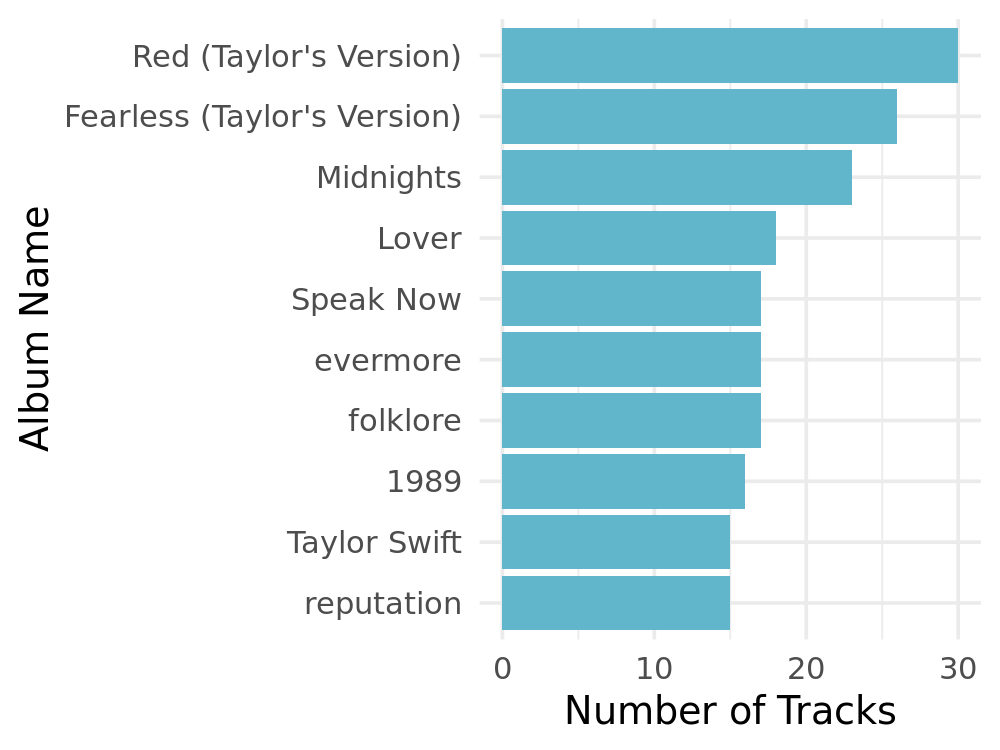

In [11]:
p = ggplot(tay_albums, aes(y = album_name)) +
    geom_bar(fill = c('#61b6cc')) +
    xlab('Number of Tracks') +
    ylab('Album Name') +
    theme_minimal()

p

The bar chart above displays the number of tracks on each of Taylor Swift's albums. Red (Taylor's Version) and Fearless (Taylor's Version), which are the only re-recordings in this dataset, appear to be the artist's albums with the most number of tracks. 

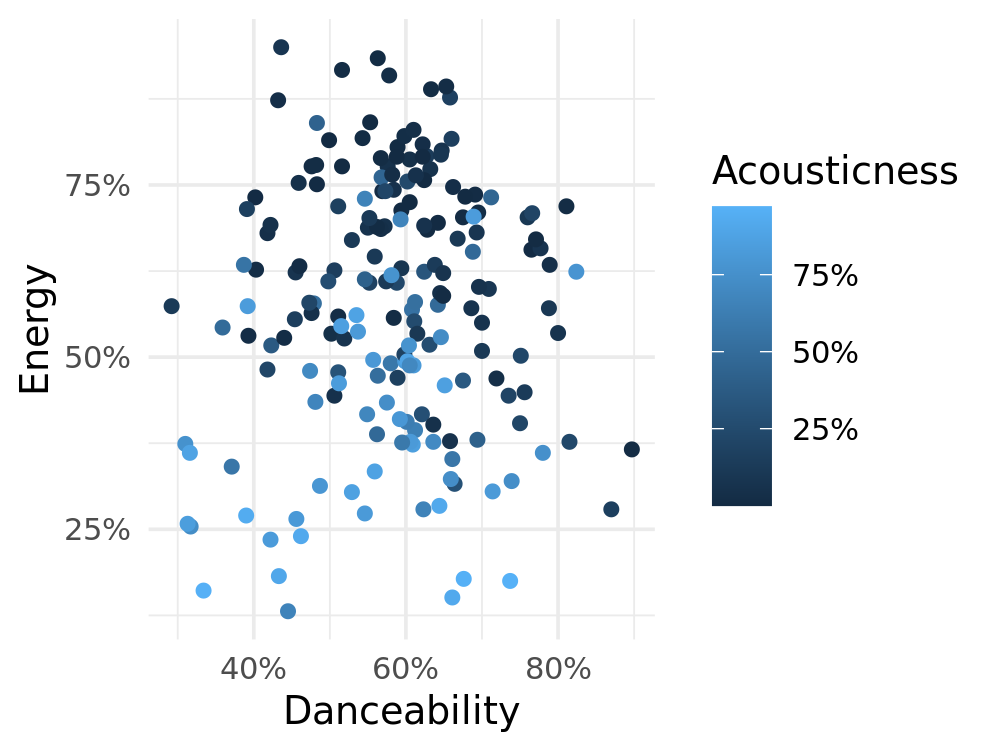

In [12]:
p2 = ggplot(taylor, aes(y = energy, x = danceability, color = acousticness)) +
    geom_point(na.rm = TRUE) +
    scale_x_continuous(labels = scales::percent_format(scale = 100)) +
    scale_y_continuous(labels = scales::percent_format(scale = 100)) +
    scale_color_continuous(name = 'Acousticness',
                           labels = scales::percent_format(scale = 100)) +
    xlab('Danceability') +
    ylab('Energy') +
    theme_minimal()

p2

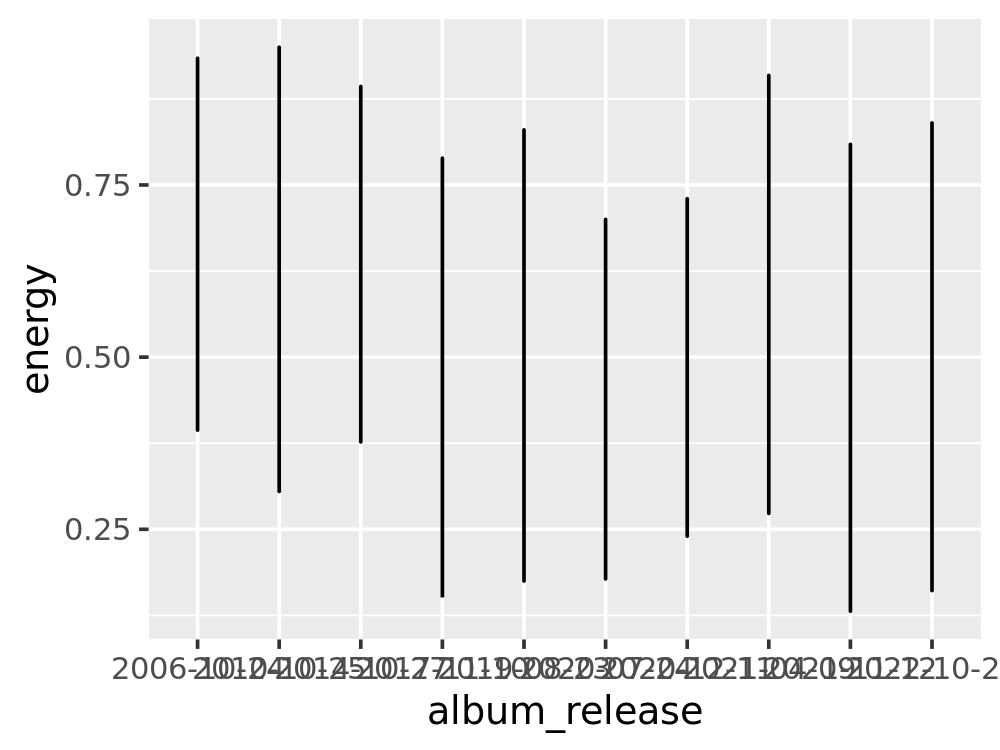

In [14]:
p3 = ggplot(taylor, aes(y = energy, x = album_release)) +
    geom_line(na.rm = TRUE)

p3